## Importing Libraries

In [47]:
# ! pip install category_encoders
# ! pip install xgboost
# ! pip install tensorflow

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from category_encoders import BinaryEncoder
from sklearn.model_selection import GridSearchCV ,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Importing the Dataset

In [49]:
import pandas as pd

WS_DF = pd.read_csv('Walmart.csv')
WS_DF.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [50]:
# For safe side I am just copying the dataset
WS_DF_org = WS_DF.copy()

In [51]:
WS_DF_org.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Data Exploration

### Information and statistical description of the dataset

In [52]:
WS_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


    
1. There are 8 columns in the dataset named "Store", "Date", "Weekly_Sales", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment".
2. All of the features are numerical, and there is only one feature of "Date.
3. There are 6453 records in the dataset.

In [53]:
WS_DF.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


From the above statistical description, I would say that
    
1. **Store**: There are 45 different stores in the dataset.
2. **Weekly_Sales**: On an average of around USD 1.05 million weekly sales were happening across all stores. The range of sales are between USD 210,986  to  USD 3.82 million.
3. **Holiday_Flag**: From the given data, the holidays are very infrequent.
4. **Temperature**: The average temperature is around 60.66 F and range is from -1.06F to 100.14F.
5. **Fuel_Price**: The average fuel proce is USD 3.36 per unit, and range lies from USD 2.47 to USD 4.47.
6. **CPI**: CPI (Consumer price index) is the average change over time in the prices paid by urban consumers for basket of consumer goods and services. The mean CPI value is  171,.58.
7. **Unemployment**: The avearge rate id approximately 8%. However the range has good difference i.e from 3.88% to 14,31%.

This data provide brief overview of the features of dataset.


### Checking for the Null values and duplicate in the dataset

In [54]:
# Null values check
WS_DF.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There are zero null values in the dataset.

In [55]:
# Checking for duplicate records
WS_DF_duplicate=WS_DF.duplicated()

# Printing the duplicate rows
print(WS_DF[WS_DF_duplicate])

# Count of duplicates
print("\nCount of duplicates: ", WS_DF_duplicate.sum())


Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []

Count of duplicates:  0


There are no duplicated records

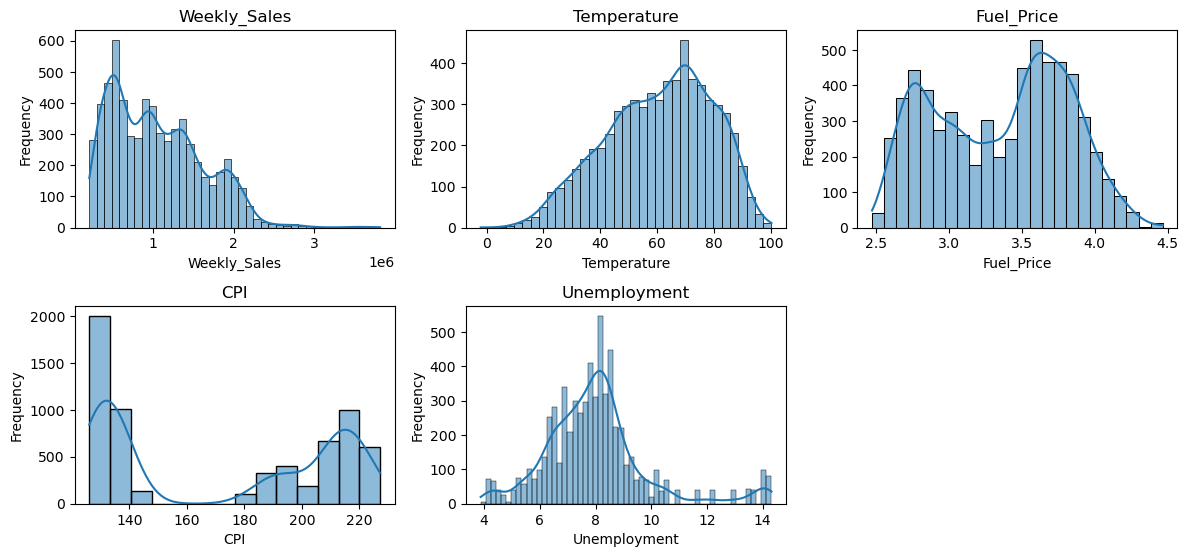

In [56]:
# Checking histplot before outlier handling 
# Visualization using Histplot

WS_DF_wo_date=WS_DF.drop(columns=['Store','Holiday_Flag','Date'])
cols=WS_DF_wo_date.columns
plt.figure(figsize=(12,8))
for i, col in enumerate(cols, start=1):
    plt.subplot(3,3,i)
    sns.histplot(WS_DF_wo_date[col], kde=True)
    plt.title(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()




### Checking for the outliers in the dataset using the boxplot

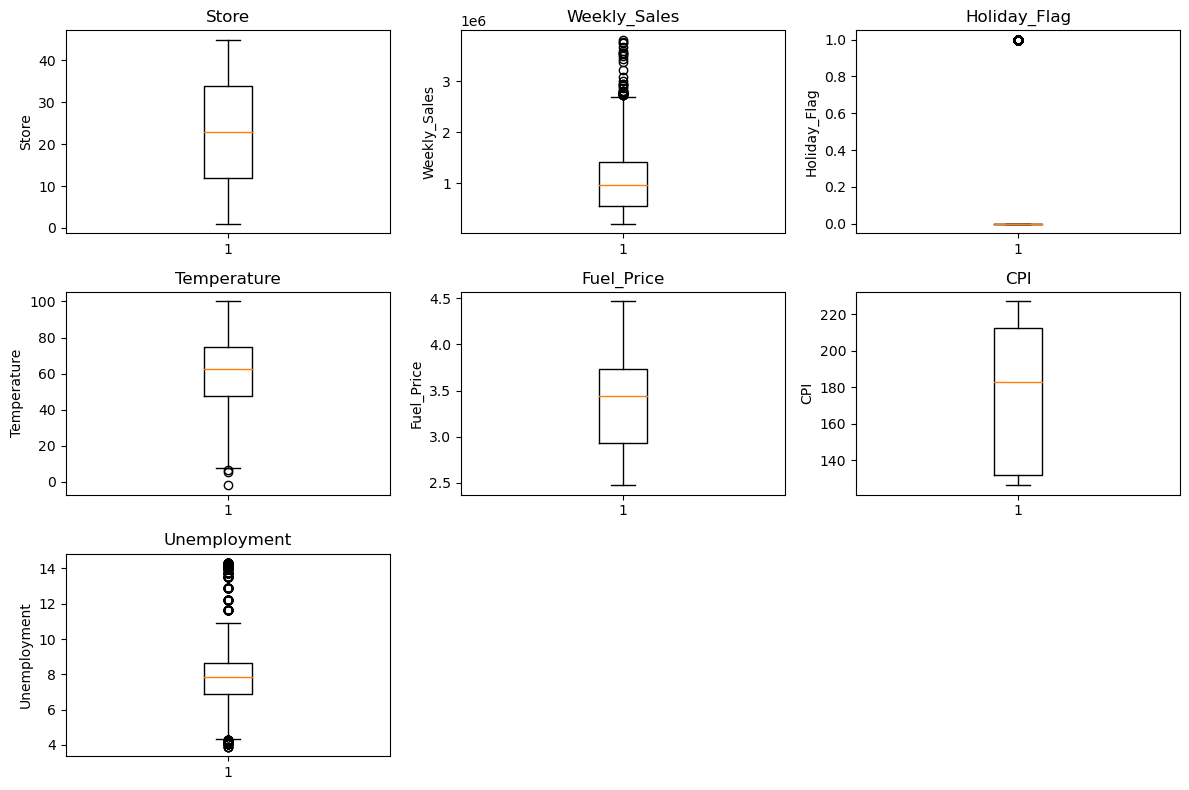

In [57]:
#Boxplot

WS_DF_wo_date=WS_DF.drop(columns=['Date'])
cols=WS_DF_wo_date.columns
plt.figure(figsize=(12,8))
for i, col in enumerate(cols, start=1):
    plt.subplot(3,3,i)
    plt.boxplot(WS_DF_wo_date[col])
    plt.title(col)
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

1. Columns "weekly_sales", "Unemployment" and "Temperature" has outliers.
2. "Weekly_sales" is completely right-skewed as it has long tail and most of the data is towards the lower values (left).

In [58]:
# finding the outliers count

# I am using InterQuartile method for checking outliers, including only actual numerical features

num_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment' ]
IQ_1 = WS_DF[num_features].quantile(0.25)
IQ_3 = WS_DF[num_features].quantile(0.75)

IQR_val = IQ_3 - IQ_1

# Finding outliers
DF_outliers = ((WS_DF[num_features] < (IQ_1 - 1.5 * IQR_val)) | (WS_DF[num_features] > (IQ_3 + 1.5 * IQR_val))).any(axis=1)

'''# Printing the rows containg outliers
print("Outliers rows are: \n", WS_DF[DF_outliers]) '''

WS_DF[DF_outliers]


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
189,2,24-12-2010,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,23-12-2011,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,26-11-2010,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,17-12-2010,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,24-12-2010,3526713.39,0,43.21,2.887,126.983581,7.127
...,...,...,...,...,...,...,...,...
5715,40,28-09-2012,919595.44,0,50.98,4.018,138.739500,4.156
5716,40,05-10-2012,1069112.00,0,57.21,4.027,138.825600,4.145
5717,40,12-10-2012,982523.26,0,47.35,4.029,138.911700,4.145
5718,40,19-10-2012,918170.50,0,46.33,4.000,138.833613,4.145


### Handling outliers using "Winsorization" 

There are 518 outliers out of 6435 records which is of 8 percent of the dataset. I will try replacing the outliers with their nearest values. 

**Note:** As the features "Weekly_Sales" and "Unemployment" seems right-skewed which is like there are extreme values as outliers. In such case the "Winsorization" is suitable algorithm to replace the outliers with their nearest less extreme values. Also the winsorization will preserve the overall distribution of the dataset. So the normal distribution is not going to be effected I believe.

In [59]:
from scipy.stats.mstats import winsorize

# Columns that are excluding
Rem_cols = ['Store', 'Date', 'Holiday_Flag']
Rem_WS_DF= WS_DF[Rem_cols].copy()

# The numerical features to apply winsorization 
num_feat = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Remove or drop columns from WS_DF dataframe
Num_WSdf = WS_DF.drop(Rem_cols, axis=1)

# Leveraging winsorization on the above listed numerical features
winsorized_WS_data = Num_WSdf[num_feat].apply(lambda x: winsorize(x, limits=(0.05, 0.05)))

# Combine excluded columns and Winsorized features
combined_df = pd.concat([Rem_WS_DF.reset_index(drop=True), pd.DataFrame(winsorized_WS_data, columns=num_feat)], axis=1)

combined_df.sample(10)


,Store,Date,Holiday_Flag,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
4860,34,19-10-2012,0,963516.28,58.47,3.610,131.149968,8.839
5737,41,04-06-2010,0,1305068.10,60.13,2.700,189.422658,7.363
870,7,30-04-2010,0,373655.61,38.99,2.766,189.575127,8.963
4139,29,07-09-2012,1,540811.85,73.30,3.921,138.472936,9.419
5774,41,18-02-2011,0,1203399.64,39.39,3.051,191.917833,7.241
5327,38,15-10-2010,0,337743.26,75.00,2.976,126.491290,12.187
5799,41,12-08-2011,0,1356689.88,67.65,3.542,194.110502,6.901
1094,8,18-11-2011,0,897032.19,51.72,3.308,221.691174,6.123
3744,27,06-08-2010,0,1908036.68,77.45,2.942,136.474112,7.982
2050,15,07-01-2011,0,509640.77,30.53,3.351,132.882323,7.771


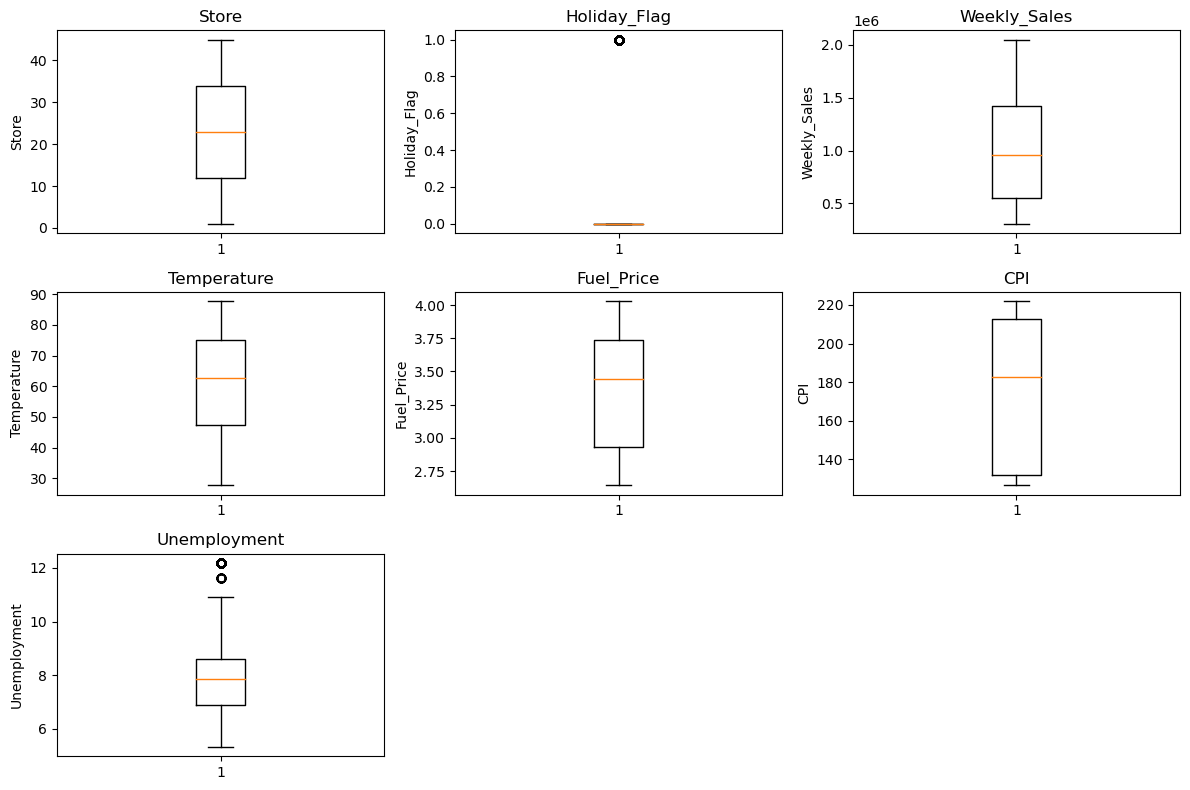

In [60]:
#Boxplot

combined_df_wo_date=combined_df.drop(columns=['Date'])
cols=combined_df_wo_date.columns
plt.figure(figsize=(12,8))
for i, col in enumerate(cols, start=1):
    plt.subplot(3,3,i)
    plt.boxplot(combined_df_wo_date[col])
    plt.title(col)
    plt.ylabel(col)
    
plt.tight_layout()
plt.show()

**Note**: There are no outliers after winsorization

In [61]:
# Copying the Outlier handled combined file to WS_DF
WS_DF=combined_df.copy()

In [62]:
# Checking the outlier replaced values, just for analysis on "with what values" they were replaced.

row_numbers = [189, 241, 471, 474, 475, 5715, 5716, 5717, 5718, 5719]
selected_records = WS_DF.iloc[row_numbers]
selected_records

,Store,Date,Holiday_Flag,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
189,2,24-12-2010,0,2049485.49,49.97,2.886,211.064660,8.163
241,2,23-12-2011,0,2049485.49,46.66,3.112,218.999550,7.441
471,4,26-11-2010,1,2049485.49,48.08,2.752,126.669267,7.127
474,4,17-12-2010,0,2049485.49,46.57,2.884,126.879484,7.127
475,4,24-12-2010,0,2049485.49,43.21,2.887,126.983581,7.127
5715,40,28-09-2012,0,919595.44,50.98,4.018,138.739500,5.326
5716,40,05-10-2012,0,1069112.00,57.21,4.027,138.825600,5.326
5717,40,12-10-2012,0,982523.26,47.35,4.029,138.911700,5.326
5718,40,19-10-2012,0,918170.50,46.33,4.000,138.833613,5.326
5719,40,26-10-2012,0,921264.52,49.65,3.917,138.728161,5.326


## Feature Engineering

 ##### Adding some more features like "Month", "Year", "Season" into the dataframe
    

In [63]:
def assign_season(Month):
    if Month in [3,4,5]:
        return 'Spring'
    elif Month in [6,7,8]:
        return 'Summer'
    elif Month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'
    

In [64]:
# converting the Date column of type object to "Date" using "to_datetime". 
WS_DF['Date'] = pd.to_datetime(WS_DF['Date'], dayfirst=True)
WS_DF['Month'] = WS_DF['Date'].dt.month
WS_DF['Year'] = WS_DF['Date'].dt.year
WS_DF['Season'] = WS_DF['Month'].apply(assign_season)


In [65]:
# Printing the dataframe after adding the features

# Head of the dataframe
WS_DF.head()

,Store,Date,Holiday_Flag,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Season
0,1,2010-02-05,0,1643690.90,42.31,2.642,211.096358,8.106,2,2010,Winter
1,1,2010-02-12,1,1641957.44,38.51,2.642,211.242170,8.106,2,2010,Winter
2,1,2010-02-19,0,1611968.17,39.93,2.642,211.289143,8.106,2,2010,Winter
3,1,2010-02-26,0,1409727.59,46.63,2.642,211.319643,8.106,2,2010,Winter
4,1,2010-03-05,0,1554806.68,46.50,2.642,211.350143,8.106,3,2010,Spring


In [66]:
# Tail of the Dataframe
WS_DF.tail()

,Store,Date,Holiday_Flag,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Season
6430,45,2012-09-28,0,713173.95,64.88,3.997,192.013558,8.684,9,2012,Autumn
6431,45,2012-10-05,0,733455.07,64.89,3.985,192.170412,8.667,10,2012,Autumn
6432,45,2012-10-12,0,734464.36,54.47,4.000,192.327265,8.667,10,2012,Autumn
6433,45,2012-10-19,0,718125.53,56.47,3.969,192.330854,8.667,10,2012,Autumn
6434,45,2012-10-26,0,760281.43,58.85,3.882,192.308899,8.667,10,2012,Autumn


## Data Analysis

### Visualizing the data using different plots

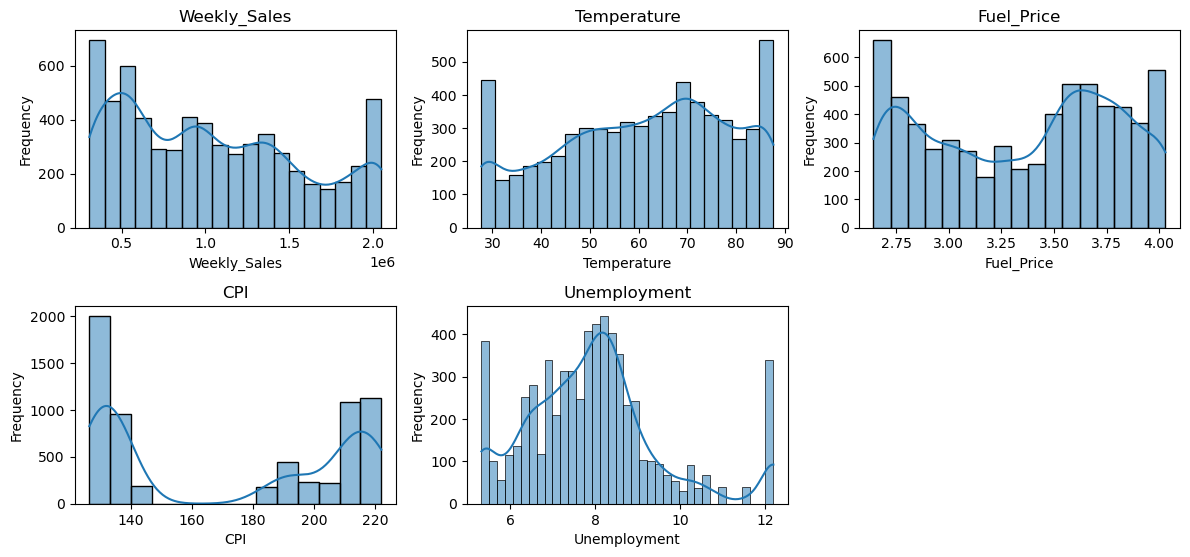

In [67]:
# Visualization using Histplot

WS_DF_wo_date=WS_DF.drop(columns=['Store','Holiday_Flag','Date', 'Month', 'Year', 'Season'])
cols=WS_DF_wo_date.columns
plt.figure(figsize=(12,8))
for i, col in enumerate(cols, start=1):
    plt.subplot(3,3,i)
    sns.histplot(WS_DF_wo_date[col], kde=True)
    plt.title(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()


From above histplots, I would say that 
    
    1. "Temperature" and "Unemployment" has Normal distribution which means there are less outliers and also well modeled using "Linear Regressor" or regressor algorithms.
    2. Whereas, "Fuel_Price" and "CPI" following "Bimodal" distribution. This means in both features there are two different peaks which are almost equal frequency.
    3. Moreover, weekly sales are "multimodal" distribution.
    
**Note:** Even after winsorization, there isn't a lot of change, but a little at extreme ends. However the overall distribution is unchanged.

### Count plot of stores to check the balance of data with respect to stores

Text(0, 0.5, 'Count')

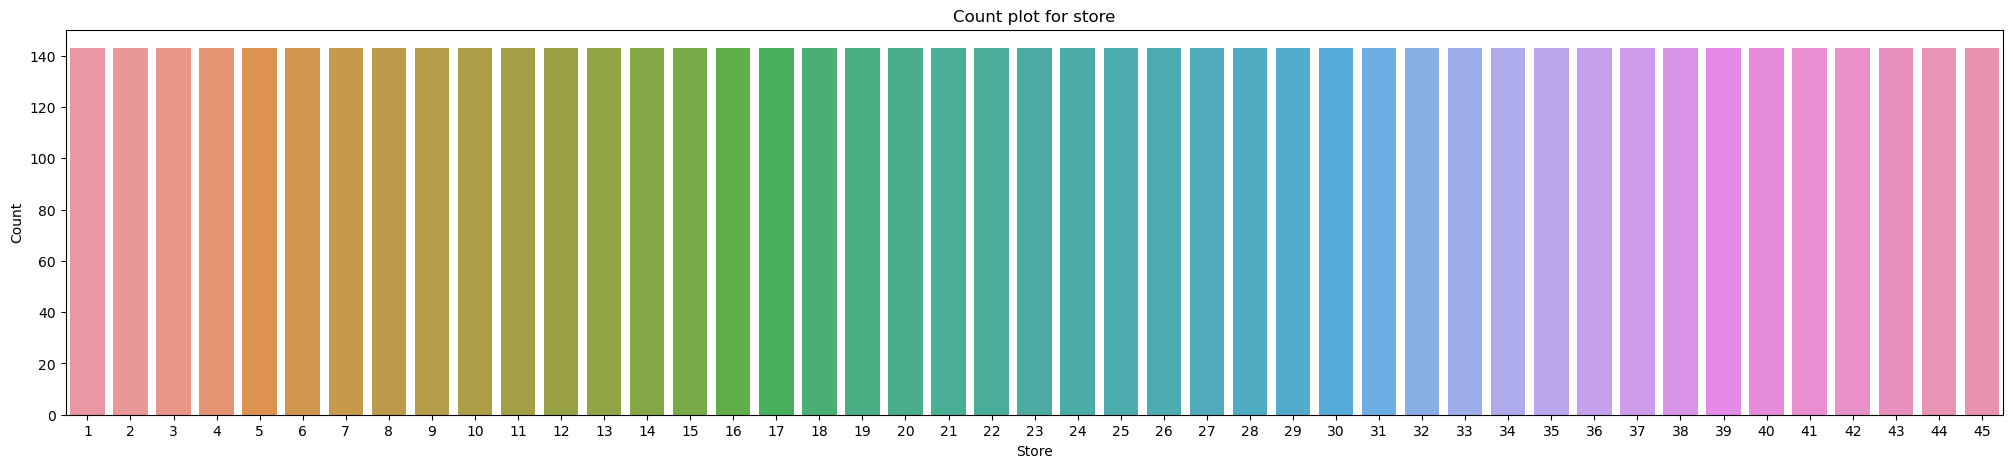

In [68]:
plt.figure(figsize=(25, 5))
sns.countplot(x='Store', data=WS_DF)
plt.title('Count plot for store')
plt.ylabel('Count')

From the above count plot, it is clear that equal data is collected from multiple stores with out any bias. All the stores has records of count 140.

### Checking the data records count for features month, season, year and holiday_flag using "countplot"

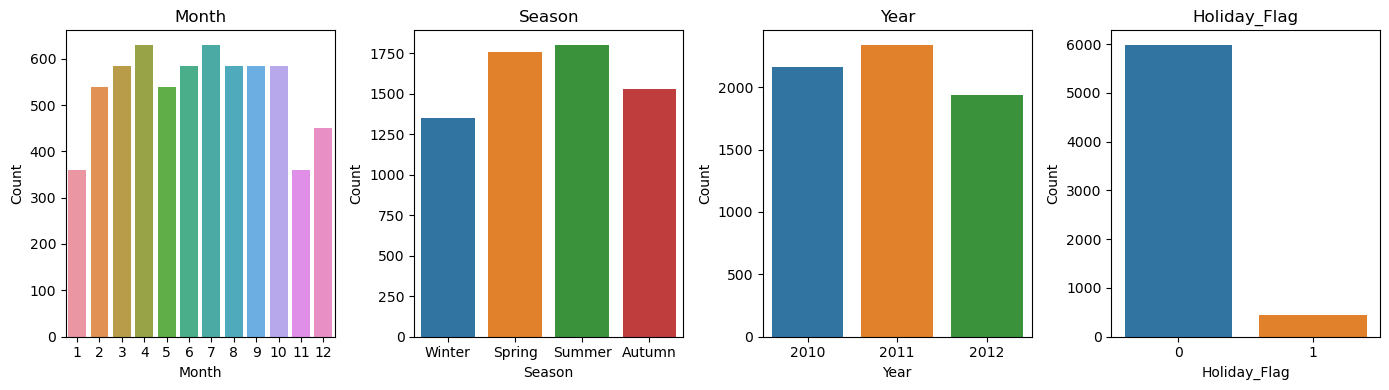

In [69]:
cols=['Month', 'Season', 'Year', 'Holiday_Flag']
plt.figure(figsize=(14,4))
for i, col in enumerate(cols, start=1):
    plt.subplot(1,4,i)
    sns.countplot(x=col, data=WS_DF)
    plt.title(col)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()


From above count plot I would say
    
    1. There is almost equal distribution of data records for the years 2010, 2011, 2012.
    2. There are more records belongs to summer and spring.
    3. Obviously the holidays are less.
    4. Highest data records are in "April", "July" which are in spring and summer seasons. also lowest data records are in November, december and january.
    

## Visualizing different graphs and features w.r.t "Weekly_Sales"

### Visualizing Weekly sales with respect to 'Month', 'Year', 'Season' and 'Holiday_Flag'.

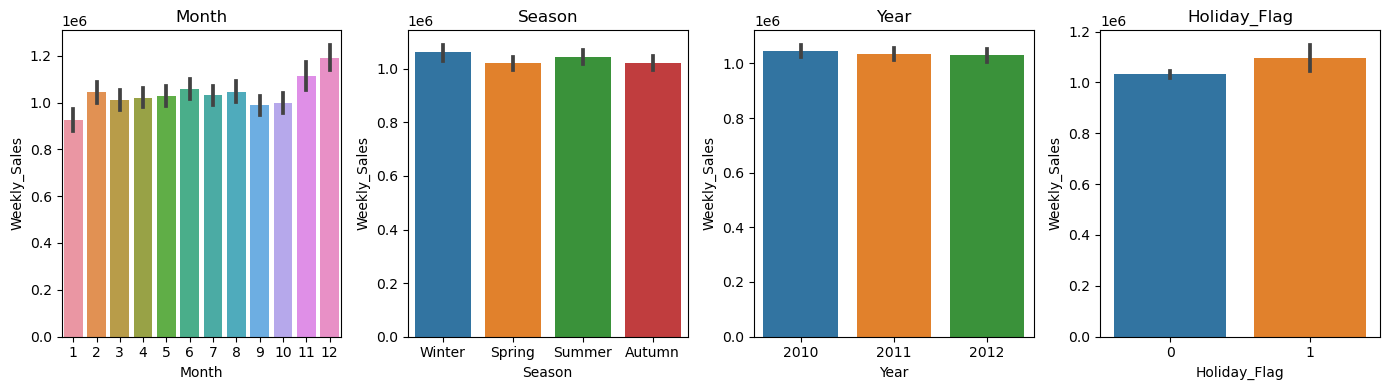

In [70]:
# To visualize the weekly sales, I am using the boxplot
cols=['Month', 'Season', 'Year', 'Holiday_Flag']
plt.figure(figsize=(14,4))
for i, col in enumerate(cols, start=1):
    plt.subplot(1,4,i)
    sns.barplot(x=col, y='Weekly_Sales', data=WS_DF)
    plt.title(col)
    plt.ylabel('Weekly_Sales')
    
plt.tight_layout()
plt.show()


From above box plot I would say
    
    1. There is almost equal distribution of Weekly_sales for the years 2010, 2011, 2012.
    2. Weekly Sales are high in "Winter" season which is a season near to "Christmas", "New year".
    3. During holidays, there were more sales comparatively.
    4. Highest weekly sales were recorded during "November" and "December" which are the months of "Black Friday" and "Christmas".

### Performing Bivariate analysis for "Weekly_Sales" w.r.t aspects like "Temperature", "Unemployment", "CPI" and ''Fuel_Price".

**Note:** First I have tried barplot which was too cozy, took too much time to dsiplay and couldn't able to understand the distribution because here every record is different for features like temperature, CPI and duel prices as they are continuous distributed data. So, then I decided scatter plot might be better option.

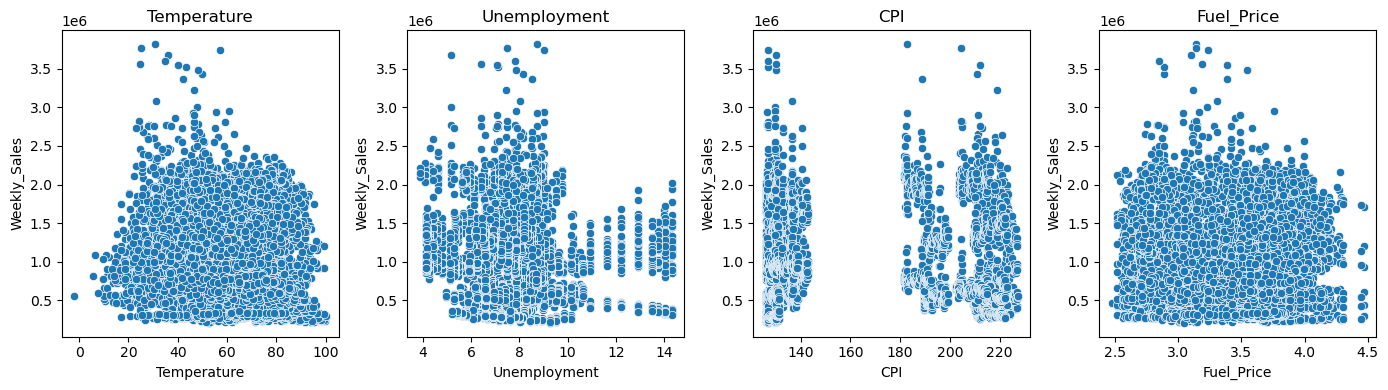

In [71]:
# To visualize the weekly sales, I am using the boxplot
cols=['Temperature', 'Unemployment', 'CPI', 'Fuel_Price']
plt.figure(figsize=(14,4))
for i, col in enumerate(cols, start=1):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col, y='Weekly_Sales', data=WS_DF_org)
    plt.title(col)
    plt.ylabel('Weekly_Sales')
    
plt.tight_layout()
plt.show()


From above scatter plots, I would like to add a point on relation between Weekly_Sales and these features
    
    1. There is strong relation to "Unemployment" and "CPI" with "Weekly_Sales" as the datapoints are tightly bound around straight line.

### Visualizing each store sales

**Note:** Here we can't use count plot because we are doing a bivariate analysis of store w.r.t Weekly_Sales. As countplot doesn't have 'y' attribute, I am using barplot. 

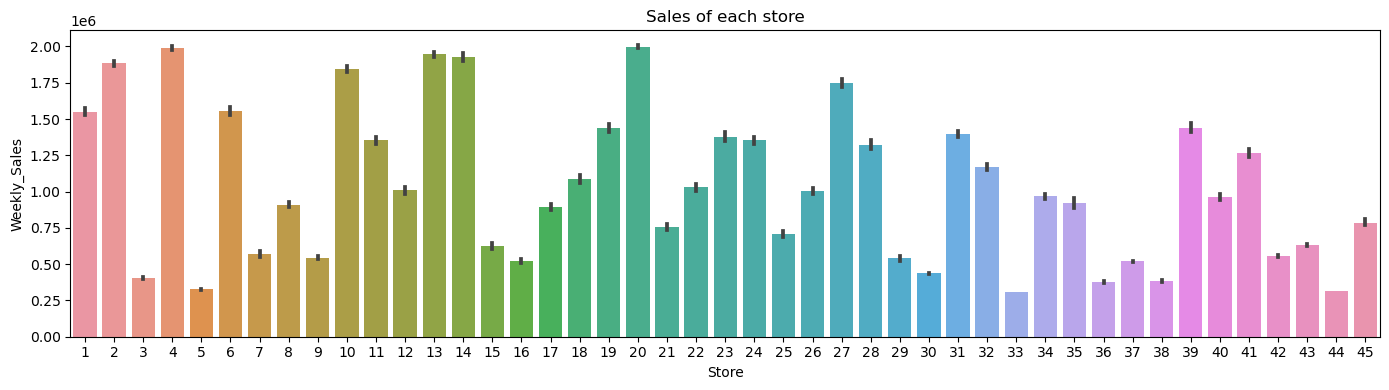

In [72]:
plt.figure(figsize=(14,4))
sns.barplot(x='Store', y='Weekly_Sales', data=WS_DF)
plt.title("Sales of each store")
plt.ylabel('Weekly_Sales')    
plt.tight_layout()
plt.show()

1. The highest sales were registered in stores 2, 4, 13, 14, 20 near to 2 Million. Whereas, stores 5,33,44 has lowest sales of aroud 0.3 million.

### Correlation of the dataset

**Note:** We can't treat store as numerical data, so we can convert it to object and avoid it from correlation calculation 

In [73]:
# Converting the 'Store' field to object (non-numeric)
WS_DF['Store'] = WS_DF['Store'].astype('object')

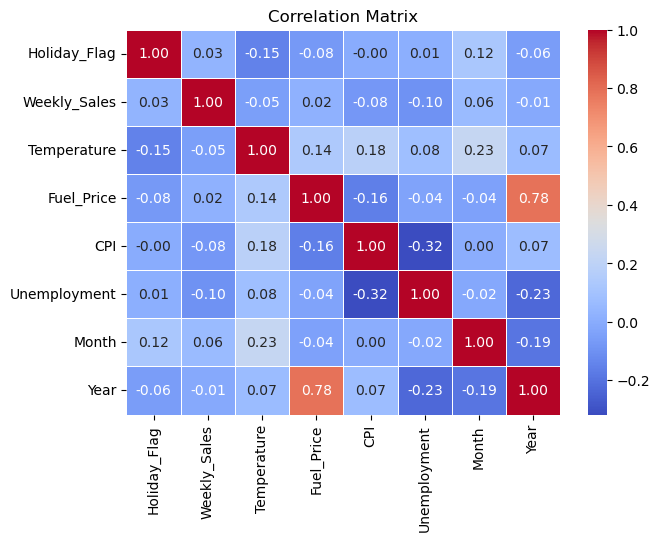

In [74]:
# Calculating correlation for only numeric features
correlation_matrix = WS_DF.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix,  cmap='coolwarm',fmt=".2f", linewidths=0.5,annot=True)#annot=True,

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()

Among the dependent features like "Temperature", "Fuel_price", "CPI", and "Unemployment", "Holiday_Flag". There is highest correlation for the "Holiday_Flag" and lowest positive correlation for the "Fuel_prices"

Whereas, there is negative correlation with "CPI", "Tempearature" and "Unemployment" which means if they increase then the sales will decrease (Inversely proportinate)

### Data Scaling and Encoding

To make the model perform better, especially the regressors, there should be scaled data. So I would like to scale the dataset.

**Scaling:** I am using "Standard Scaler" as most of the numerical features follow normal distribution (Gaussian distribution). As we know that standard scaler is suitable one for this. 

**Encoding:** For encoding the categorical features like 'Store' and 'Season' which has wide range of categories, the "Binary Encoder" is most suitable one among others.

In [75]:
# Scaling of numerical features using "Standard Sclaer"

numeric_cols = ['Temperature', 'Unemployment', 'CPI', 'Fuel_Price', 'Weekly_Sales']

#Scaling
ss = StandardScaler()
WS_DF[numeric_cols] = ss.fit_transform(WS_DF[numeric_cols])

WS_DF.head()

,Store,Date,Holiday_Flag,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Season
0,1,2010-02-05,0,1.139931,-1.052565,-1.602617,1.010708,0.09454,2,2010,Winter
1,1,2010-02-12,1,1.136676,-1.269102,-1.602617,1.014428,0.09454,2,2010,Winter
2,1,2010-02-19,0,1.080364,-1.188185,-1.602617,1.015626,0.09454,2,2010,Winter
3,1,2010-02-26,0,0.700613,-0.806398,-1.602617,1.016405,0.09454,2,2010,Winter
4,1,2010-03-05,0,0.973031,-0.813805,-1.602617,1.017183,0.09454,3,2010,Spring


In [76]:
# Encoding using "Binary Encoder"
bi_encoder = BinaryEncoder(cols=['Store', 'Season'])
WS_DF = bi_encoder.fit_transform(WS_DF)


### Splitting the dataset to train and test data

In [77]:
# First I am removing the unnecessary columns "Date" and "Year". 
# Also dropping 'Weekly_Sales' which is a target feature and saving in 'y'

X_features = WS_DF.drop(columns=['Date','Year', 'Weekly_Sales'])
Y_features = WS_DF['Weekly_Sales']

#Considering an 80-20 split strategy.
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_features, test_size=0.2, random_state=42 )

### Tuning and Evaluation of models using "GridSearchCV"

In [78]:
# I am using "GridSearchCV" for hyper parameter tuning and ...
# to choosing best parameter

def model_tune_evaluation(model, grid_parameters):
    #Initializing the GridSearchCV with basic parameters
    # Chosen cv=5, because lower cv folds (<=3) might cause biased estimator, so I am chosing 5, which is also suitable for this moderate sized dataset.  
    grid_search_cv = GridSearchCV(estimator=model, param_grid=grid_parameters, cv=5, scoring='r2')
    
    # Fitting the GridSearchCV
    grid_search_cv.fit(X_train, y_train)
    
    # getting better parameter among given
    better_params = grid_search_cv.best_params_
    # getting better model(estimator)
    better_model = grid_search_cv.best_estimator_
    # getting better scoring value
    better_score = grid_search_cv.best_score_
    
    # Printing the results
    print("Better parameter is:", better_params)
    print("Mean r2-score value of best-estimator: ", better_score)
    print("\nAccuracy of Training data:", better_model.score(X_train, y_train))
    print("Accuracy of Test data:", better_model.score(X_test,y_test))
    
    return better_model
    

#### Note: I am using "pipelines" to build my Linear regressor and ridge because, I am comparing polynomials to get the better one.

### Model 1: Linear Regression

In "LinearRegression" initialization as I am not providing any values to main parameters "coef_"(weights) and "intercept_" as I am testing basic regressor. 

In [79]:
# Using pipeline to build my model by including polynomial degrees, starting with degree=2
# This pipeline first convert the input features to second degree polynomial features.
Linear_regressor = make_pipeline(PolynomialFeatures(degree=2),  
                                LinearRegression() )

# Listing the hyperparameters, I am trying to compare polynomial degrees 2,3,4 
grid_parameters = {'polynomialfeatures__degree':[2,3,4]}

# Calling model tuning and evaluation method
Linear_regressor = model_tune_evaluation(Linear_regressor, grid_parameters)

Better parameter is: {'polynomialfeatures__degree': 3}
Mean r2-score value of best-estimator:  0.9699425416313753

Accuracy of Training data: 0.980627883449842
Accuracy of Test data: 0.9703187584768928


### Model 2: Ridge Regressor

In [80]:
# I am using pipeline to compare the polynomial degrees using ridge
Ridge_regressor = make_pipeline(PolynomialFeatures(degree=2),
                                Ridge())

# Listing the hyperparameters, I am trying to compare polynomial degrees 2,3,4 
grid_parameters = {'polynomialfeatures__degree':[2,3,4], 'ridge__alpha':[1e-2, 1e-3, 1e-4]}

# Calling model tuning and evaluation method
Ridge_regressor = model_tune_evaluation(Ridge_regressor, grid_parameters )

C:\Users\mouni\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.92402e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mouni\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.00498e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mouni\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.07288e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mouni\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=6.91383e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mouni\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:20

Better parameter is: {'polynomialfeatures__degree': 3, 'ridge__alpha': 0.001}
Mean r2-score value of best-estimator:  0.9699653890584766

Accuracy of Training data: 0.9806265003022249
Accuracy of Test data: 0.9703273652811368


### Model 3: KNN 

In [81]:
# Initializing the KNN model
KNN = KNeighborsRegressor()

# Hyperparameter tuning
# Initializing KNN attributes with multiple values to get best combination for this dataset
grid_parameters = { 'n_neighbors': np.arange(1,11), # how many nearest data points to consider
                  'weights': ['uniform', 'distance'], # weights of neighbor data points
                   'metric':['manhattan', 'euclidean', 'minkowski'],
                  'algorithm': ['auto', 'kd_tree', 'brute','ball_tree'], # Algorithm used to compute the nearest neighbors
                  'leaf_size': [10,20,30,40 ] # leaf size of tree Data structure
                  }

KNN = model_tune_evaluation(KNN, grid_parameters)

Better parameter is: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Mean r2-score value of best-estimator:  0.920039690193611

Accuracy of Training data: 1.0
Accuracy of Test data: 0.9455975290520936


### Model 4: Decision Tree

In [82]:
# Initializing the DT model
DT = DecisionTreeRegressor()

# Initializing KNN attributes with multiple values to get best combination for this dataset
grid_parameters = {'max_depth': [None, 10, 20, 30], # adding "None" allows the tree to grow until completes
                  'min_samples_split': np.arange(2, 10),
                  'min_samples_leaf' :np.arange(2, 6) # minimum leaf values will give precise accuracy
                  #'max_features': ['sqrt', 'auto', 'log2', None], # Default one is "auto"
                  #'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
                  }
DT = model_tune_evaluation(DT, grid_parameters)

Better parameter is: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 6}
Mean r2-score value of best-estimator:  0.9549866398606012

Accuracy of Training data: 0.9803769459151905
Accuracy of Test data: 0.9535315168393277


### Plotting feature importance of Decision Tree

Text(0.5, 1.0, 'Feature Importance of DT')

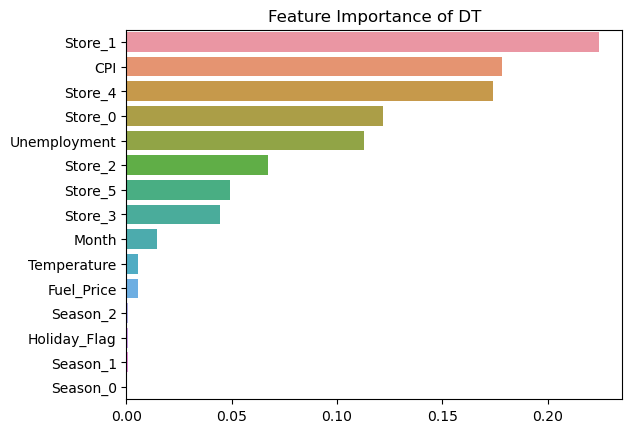

In [83]:
Feature_importance = pd.Series(DT.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=Feature_importance, y=Feature_importance.index)
plt.title('Feature Importance of DT')

Among all the features, "CPI", "Unemployment" and stores 1, 4, 0 are playing crucial role in predicting the "Weekly_Sales".

### Model 5: Random Forest

In [84]:
# Initializing the DT model
RF = RandomForestRegressor()

# Initializing KNN attributes with multiple values to get best combination for this dataset
# It is taking a lot of time for executing all these hyper parameters list, 
# So, I would like to test by confining to major two attributes for this RF
grid_parameters = {'n_estimators': np.arange(25,101,25),
                   'max_depth': np.arange(2,20)
                  }

# Calling model tuning and evaluation method
RF = model_tune_evaluation(RF,grid_parameters )

Better parameter is: {'max_depth': 13, 'n_estimators': 75}
Mean r2-score value of best-estimator:  0.9633943515760522

Accuracy of Training data: 0.9930537263913555
Accuracy of Test data: 0.960835140343502


### Model 6: XGBoost

In [ ]:
# Initializing the XGBoost model
XGB_Regressor = XGBRegressor()

# Initializing KNN attributes with multiple values to get best combination for this dataset
# It is taking a lot of time for executing all these hyper parameters list, 
# So, I would like to test by confining to major two attributes for this RF
grid_parameters = { 'max_depth': np.arange(2, 20),
                  'n_estimators': np.arange(10,201,10)}

XGB_Regressor = model_tune_evaluation(XGB_Regressor, grid_parameters)

### Model 7: LSTM

In [ ]:
# import libraries
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Reshaping X_features

X_features_reshape = X_features.values
X_features_reshape_LSTM = X_features_reshape.reshape(X_features_reshape.shape[0], X_features_reshape.shape[1], 1)

X_features_reshape_LSTM

In [ ]:
# Splitting to train and test for LSTM
#Considering an 80-20 split strategy.
X_train, X_test, y_train, y_test = train_test_split(X_features_reshape_LSTM, Y_features, test_size=0.2, random_state=42 )

In [ ]:
def Compile_Test(My_model):
  # Compile the model
  My_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

  # Train the model
  My_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

  # Evaluate the model on the test set
  test_loss, test_mae = My_model.evaluate(X_test, y_test)
  print(f"Test Mean absolute error : {test_mae * 100:.2f}%")

In [ ]:
# Define the LSTM model
LSTM_Model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(6, 1), activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu',return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')])

Compile_Test(LSTM_Model)

**MSE** = 1.07

**Standard deviation** = 5.643666e+05

**variance =** (Standard Deviation)^2 = (5.643666e+05)^2 = 318,509,659,195.56

**Note:** Variance is calculated from the standard deviation of "Weekly_Sales" from describe().

**---------------------------------------------------------------**

**R-square error = 1- (MSE/variance)**

**R-square error** = 1- (1.07/318,509,659,195.56) = 0.99999 

**-->** The R-Squared error of LSTM is **"0.99999"**



## Final insights from the above analysis

1. From the store count plot, it is clear that equal data is collected from multiple stores with out any bias. All the stores has records of approximate count 140.

2. Moreover, there is almost equal distribution of data records for the years 2010, 2011, 2012.

3. Eventhough there are more records belongs to summer and spring, the highest weekly sales were recorded during winter that is "November" and "December" which are the months of "Black Friday" and "Christmas".

4. From different visualizations like histplots, scatterplot and correlation heatmaps
    
    1. "Temperature" and "Unemployment" has Normal distribution.
    2. From scatter plot, strong relation to "Unemployment" and "CPI" with "Weekly_Sales" as the datapoints are tightly bound around straight line.
    3. Correlation heatmap says there is comparatively strong negative correlation with "CPI", "Tempearature" and "Unemployment" which means if they increase then the sales will decrease (Inversely proportinate)

5. The highest sales were registered in stores 2, 4, 13, 14, 20 near to 2 Million. Whereas, stores 5,33,44 has lowest sales of aroud 0.3 million.

6. Among all the features, "CPI", "Unemployment" and stores 1, 4, 0 are playing crucial role in predicting the "Weekly_Sales".


## Comparative analysis among algorithms 

When compared to all the Algorithms the "LSTM" got the better R2-score, so I believe that the LSTM is best algorithm than all other. Whereas, XGBoost, Linear and Ridge regressors were in next rank.


There are some strong reasons behind the LSTM being top performer:
    
    1. LSTM has a capability to capture or memorize the long sequential data, which makes it suitable for the complex patterns like walmart sales data
    2. As it has strong memory retention, it can predict accurately even with long intervals between two events.
    3. LSTM also has wonderful ability to handle nonlinear data makes it even more powerful in forecasting the sales data by outperforming all other machine learning regressor algorithms in this case.

### CONCLUSION:
So in predicting this walmart weekly_sales, **LSTM** outperformed all other algorithm. The other three algorithms XGBoost, Linear and Ridge Regressor were almost in second place. 